In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git


Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 1 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 28.32 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.


In [ ]:
import os
import shutil

source_path = "/content/PlantVillage-Dataset/raw/color"
target_path = "/content/tomato_only"

os.makedirs(target_path, exist_ok=True)

for folder in os.listdir(source_path):
    if folder.startswith("Tomato___"):
        shutil.copytree(os.path.join(source_path, folder),
                        os.path.join(target_path, folder))

print("✅ Only Tomato classes copied successfully!")


✅ Only Tomato classes copied successfully!


In [ ]:
import os
import random
import shutil

source = "/content/PlantVillage-Dataset/raw/color"
target = "/content/tomato_small"

os.makedirs(target, exist_ok=True)

for folder in os.listdir(source):
    if folder.startswith("Tomato___"):
        full_folder_path = os.path.join(source, folder)
        selected_images = random.sample(os.listdir(full_folder_path), 300)

        new_folder = os.path.join(target, folder)
        os.makedirs(new_folder, exist_ok=True)

        for img in selected_images:
            shutil.copy(os.path.join(full_folder_path, img), os.path.join(new_folder, img))

print("✅ Created small tomato dataset (300 images per class)")


✅ Created small tomato dataset (300 images per class)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Use only tomato data
data_path = "/content/tomato_small"

# Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=val_data)


Found 2400 images belonging to 10 classes.
Found 600 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.1435 - loss: 2.2710 - val_accuracy: 0.3350 - val_loss: 1.9144
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.4153 - loss: 1.7905 - val_accuracy: 0.6067 - val_loss: 1.3943
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.5560 - loss: 1.3482 - val_accuracy: 0.6400 - val_loss: 1.1156
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.6209 - loss: 1.1190 - val_accuracy: 0.6767 - val_loss: 1.0213
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.6886 - loss: 0.9753 - val_accuracy: 0.7017 - val_loss: 0.9357
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.7181 - loss: 0.8817 - val_accuracy: 0.7033 - val_loss: 0.9346
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.7561 - loss: 0.7777 - val_accuracy: 0.7150 - val_loss: 0.8469
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.7766 - loss: 0.6946 - val_accuracy: 0.7283 - v

In [ ]:
model.save("tomato_leaf_model.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model("tomato_leaf_model.h5")

# Get class names from the data generator
class_names = list(train_data.class_indices.keys())
print("✅ Model Loaded. Classes:", class_names)


✅ Model Loaded. Classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load trained model (only if not loaded already)
from tensorflow.keras.models import load_model
model = load_model("tomato_leaf_model.h5")

# Get class names (ensure this matches training order)
class_names = list(train_data.class_indices.keys())

# Path to your dataset folders
test_base = "/content/tomato_only"  # Or 'tomato_small' if you used fewer images

# Function to predict one image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    predicted_class = class_names[class_index]
    confidence = prediction[0][class_index]

    return predicted_class, confidence, img

# Predict 5 images from each folder
for category in os.listdir(test_base):
    category_path = os.path.join(test_base, category)

    if not os.path.isdir(category_path):
        continue  # Skip if it's not a folder

    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]

    if len(image_files) < 5:
        continue  # Skip small folders

    sample_images = random.sample(image_files, 5)

    print(f"\n🔍 Actual Category: {category}")
    plt.figure(figsize=(15, 5))

    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(category_path, image_name)
        predicted_class, confidence, img = predict_image(img_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Pred: {predicted_class.split('___')[-1]}\nConf: {confidence*100:.1f}%")
        plt.axis('off')

    plt.suptitle(f"Actual Category: {category}", fontsize=16)
    plt.tight_layout()
    plt.show()


Saving tomato_leaf.jpg to tomato_leaf.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


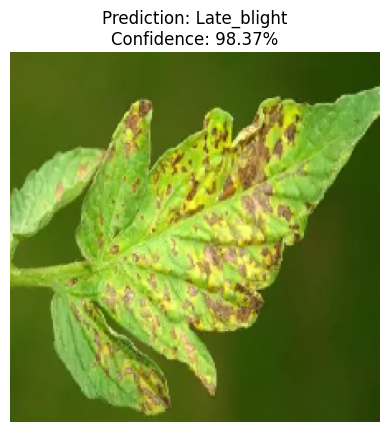

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ✅ Load your trained model
model = load_model("tomato_leaf_model.h5")

# ✅ Set class names from training data
class_names = sorted(os.listdir("/content/tomato_only"))  # or "tomato_small"

# ✅ Upload your own leaf image
uploaded = files.upload()  # Select one or more image files

# ✅ Predict each uploaded image
for filename in uploaded.keys():
    img = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    predicted_class = class_names[class_index]
    confidence = prediction[0][class_index]

    # ✅ Show image and prediction
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class.split('___')[-1]}\nConfidence: {confidence*100:.2f}%")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Recording_voice_files.zip to Recording_voice_files.zip


In [ ]:
import zipfile

with zipfile.ZipFile("Recording_voice_files.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("✅ Voice files unzipped!")


✅ Voice files unzipped!


In [ ]:
pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 33.9 MB/s eta 0:00:00


In [ ]:
!unzip -l Recording_voice_files.zip


Archive:  Recording_voice_files.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-06-24 05:51   Recording_voice_files/
        0  2025-06-24 05:44   Recording_voice_files/english_records/
    98541  2025-06-23 02:33   Recording_voice_files/english_records/_Large_dark_spots_on.mp3
   108909  2025-06-23 02:33   Recording_voice_files/english_records/_Leaves_turning_yell.mp3
   119853  2025-06-23 02:33   Recording_voice_files/english_records/_Small_black_spots_a.mp3
   103149  2025-06-23 02:33   Recording_voice_files/english_records/_Spots_look_like_tar.mp3
    88749  2025-06-23 02:33   Recording_voice_files/english_records/_This_tomato_plant_healthy.mp3
    88749  2025-06-23 02:33   Recording_voice_files/english_records/_Web_like_patches_on.mp3
    96237  2025-06-23 02:33   Recording_voice_files/english_records/_Yellowish_mold_unde.mp3
        0  2025-06-24 05:41   Recording_voice_files/telugu_records/
   101900  2025-06-23 02:34   Recording_voice_f

In [ ]:
!pip install pydub
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import os
import speech_recognition as sr
from pydub import AudioSegment


In [ ]:
import zipfile

with zipfile.ZipFile("Recording_voice_files.zip", 'r') as zip_ref:
    zip_ref.extractall("Recording_voice_files")  # Extract into folder


In [ ]:
from pydub import AudioSegment
import os

input_folder = "/content/Recording_voice_files/Recording_voice_files/telugu_records"
output_folder = "/content/Recording_voice_files/Recording_voice_files/telugu_records_wav"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".m4a"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename.replace(".m4a", ".wav"))

        audio = AudioSegment.from_file(input_path)
        audio.export(output_path, format="wav")
        print(f"✅ Converted: {filename} → {output_path}")

✅ Converted: 1_Tomato_Bacterial_Spot.m4a → /content/Recording_voice_files/Recording_voice_files/telugu_records_wav/1_Tomato_Bacterial_Spot.wav
✅ Converted: 9_Tomato_Masoic_Virus.m4a → /content/Recording_voice_files/Recording_voice_files/telugu_records_wav/9_Tomato_Masoic_Virus.wav
✅ Converted: 2_Tomato_Early_Blight.m4a → /content/Recording_voice_files/Recording_voice_files/telugu_records_wav/2_Tomato_Early_Blight.wav
✅ Converted: 3_Tomato_Late_Blight.m4a → /content/Recording_voice_files/Recording_voice_files/telugu_records_wav/3_Tomato_Late_Blight.wav
✅ Converted: 7_Tomato_Target_Spot.m4a → /content/Recording_voice_files/Recording_voice_files/telugu_records_wav/7_Tomato_Target_Spot.wav
✅ Converted: 10_Tomato_Healthy.m4a → /content/Recording_voice_files/Recording_voice_files/telugu_records_wav/10_Tomato_Healthy.wav
✅ Converted: 8_Tomato_Yellow_Leaf_Curl_Virus.m4a → /content/Recording_voice_files/Recording_voice_files/telugu_records_wav/8_Tomato_Yellow_Leaf_Curl_Virus.wav
✅ Converted: 6_

In [ ]:
import os
import speech_recognition as sr

recognizer = sr.Recognizer()

# ✅ Correct file path based on your structure
voice_path = "/content/Recording_voice_files/Recording_voice_files/telugu_records_wav/8_Tomato_Yellow_Leaf_Curl_Virus.wav"

def get_telugu_solution(text):
    if "బ్లాక్" in text or "స్పాట్" in text or "రింగ్" in text or "చీకటి" in text:
        return "⚫ ఆకులపై నలుపు లేదా రింగ్ మచ్చలు: శిలీంధ్రం లేదా బ్యాక్టీరియా సమస్య.\n💊 కాపర్ ఫంగిసైడ్ వాడండి."
    elif "పచ్చ" in text or "ఎల్లో" in text:
        return "🟡 ఆకులు పచ్చగా మారడం: పోషక లోపం లేదా వైరస్.\n💊 NPK ఎరువులు వేసి తెల్లదోమలు నియంత్రించండి."
    elif "మోల్డ్" in text or "తెల్లగా" in text or "పొడి" in text:
        return "⚪ ఆకుల కింద తెల్లటి లేదా పచ్చటి మచ్చలు: ఇది లీఫ్ మోల్డ్ కావచ్చు.\n💊 నిమ్ ఆయిల్ లేదా సల్ఫర్ స్ప్రే వాడండి."
    elif "నెట్" in text or "జాలం" in text or "స్పైడర్" in text:
        return "🕸️ స్పైడర్ మైట్స్ సమస్య.\n💊 నిమ్ ఆయిల్ లేదా ఇన్సెక్టిసైడల్ సొప్ వాడండి."
    elif "వంపు" in text or "కర్ల్" in text or "పగలడం" in text:
        return "🌪️ ఆకుల వంపు లేదా పగలడం: వైరస్ సోకిన మొక్క.\n💊 బాధిత మొక్కలు తొలగించండి మరియు పురుగుమందులు పూయండి."
    elif "హెల్తీ" in text or "సమస్య లేదు" in text or "పర్వాలేదు" in text:
        return "✅ ఈ మొక్క ఆరోగ్యంగా ఉంది. ఎలాంటి సమస్య లేదు!"
    else:
        return "🤔 స్పష్టంగా గుర్తించలేకపోయాం. మరింత స్పష్టంగా చెప్పండి లేదా కొత్తగా రికార్డ్ చేయండి."

# 🔄 Recognize speech from selected file
file_path = voice_path
print(f"\n🎧 ఫైల్: {os.path.basename(file_path)}")
with sr.AudioFile(file_path) as source:
    audio_data = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio_data, language='te-IN')
        print(f"🗣️ మాటలు: {text}")
        print(get_telugu_solution(text))
    except sr.UnknownValueError:
        print("❌ స్పీచ్ అర్థం కాలేదు.")
    except sr.RequestError:
        print("❌ Google API లో సమస్య ఉంది.")



🎧 ఫైల్: 8_Tomato_Yellow_Leaf_Curl_Virus.wav
🗣️ మాటలు: ఆకులు పగిలిపోయిన లాగా కార్లు ఎల్లో గా మారుతున్నాయి వైరస్ సింటమ్స్ ఇది
🟡 ఆకులు పచ్చగా మారడం: పోషక లోపం లేదా వైరస్.
💊 NPK ఎరువులు వేసి తెల్లదోమలు నియంత్రించండి.


In [ ]:
from pydub import AudioSegment
import os

input_folder = "/content/Recording_voice_files/Recording_voice_files/english_records"
output_folder = "/content/Recording_voice_files/Recording_voice_files/english_records_wav"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".mp3"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename.replace(".mp3", ".wav"))

        audio = AudioSegment.from_file(input_path)
        audio.export(output_path, format="wav")
        print(f"✅ Converted: {filename} → {output_path}")


✅ Converted: _Yellowish_mold_unde.mp3 → /content/Recording_voice_files/Recording_voice_files/english_records_wav/_Yellowish_mold_unde.wav
✅ Converted: _Small_black_spots_a.mp3 → /content/Recording_voice_files/Recording_voice_files/english_records_wav/_Small_black_spots_a.wav
✅ Converted: _Large_dark_spots_on.mp3 → /content/Recording_voice_files/Recording_voice_files/english_records_wav/_Large_dark_spots_on.wav
✅ Converted: _Leaves_turning_yell.mp3 → /content/Recording_voice_files/Recording_voice_files/english_records_wav/_Leaves_turning_yell.wav
✅ Converted: _Web_like_patches_on.mp3 → /content/Recording_voice_files/Recording_voice_files/english_records_wav/_Web_like_patches_on.wav
✅ Converted: _Spots_look_like_tar.mp3 → /content/Recording_voice_files/Recording_voice_files/english_records_wav/_Spots_look_like_tar.wav
✅ Converted: _This_tomato_plant_healthy.mp3 → /content/Recording_voice_files/Recording_voice_files/english_records_wav/_This_tomato_plant_healthy.wav


In [ ]:
import speech_recognition as sr

recognizer = sr.Recognizer()
voice_path = "/content/Recording_voice_files/Recording_voice_files/english_records_wav"

def get_english_solution(text):
    text = text.lower()
    if "yellow" in text and "leaves" in text:
        return "🟡 Yellowing leaves: Possible nutrient deficiency or viral issue.\n💊 Apply NPK fertilizer and control whiteflies."
    elif "black spots" in text or "dark" in text:
        return "⚫ Black/Dark spots: Possibly early blight or fungal infection.\n💊 Use copper-based fungicide."
    elif "mold" in text or "white" in text:
        return "⚪ White mold or powdery mildew.\n💊 Use neem oil or sulfur spray."
    elif "web" in text:
        return "🕸️ Web-like symptoms: Likely spider mites.\n💊 Spray neem oil or insecticidal soap."
    elif "curl" in text or "twist" in text:
        return "🌪️ Curling leaves: Could be leaf curl virus.\n💊 Remove infected leaves and spray appropriate insecticide."
    else:
        return "🤔 Couldn't detect issue. Please re-record or add an image for better results."

# Loop through converted WAV files
for file in os.listdir(voice_path):
    if file.endswith(".wav"):
        file_path = os.path.join(voice_path, file)
        print(f"\n🎧 Processing: {file}")
        with sr.AudioFile(file_path) as source:
            audio_data = recognizer.record(source)
            try:
                text = recognizer.recognize_google(audio_data)
                print(f"🗣️ Spoken Text: {text}")
                print(get_english_solution(text))
            except sr.UnknownValueError:
                print("❌ Could not understand the speech.")
            except sr.RequestError:
                print("❌ Google API issue.")



🎧 Processing: _Leaves_turning_yell.wav
🗣️ Spoken Text: leaves turning yellow and curling symptom of yellow leaf curl virus
🟡 Yellowing leaves: Possible nutrient deficiency or viral issue.
💊 Apply NPK fertilizer and control whiteflies.

🎧 Processing: _Web_like_patches_on.wav
🗣️ Spoken Text: the black patches on leaves sign of spider mites
🤔 Couldn't detect issue. Please re-record or add an image for better results.

🎧 Processing: _Yellowish_mold_unde.wav
🗣️ Spoken Text: yellowish mould under the leaves it's a symptom of leaf mould
🟡 Yellowing leaves: Possible nutrient deficiency or viral issue.
💊 Apply NPK fertilizer and control whiteflies.

🎧 Processing: _Large_dark_spots_on.wav
🗣️ Spoken Text: large dark spots on groin leaves possibly LED light
⚫ Black/Dark spots: Possibly early blight or fungal infection.
💊 Use copper-based fungicide.

🎧 Processing: _This_tomato_plant_healthy.wav
🗣️ Spoken Text: does tomato plant has no issues it is healthy
🤔 Couldn't detect issue. Please re-record 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the model (adjust path if needed)
model = load_model("tomato_leaf_model.h5")

# Load class names from training data
class_names = list(train_data.class_indices.keys())

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    class_index = np.argmax(prediction)
    confidence = prediction[class_index]

    return class_names[class_index], confidence


In [ ]:
import speech_recognition as sr

def transcribe_voice(wav_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(wav_path) as source:
        audio = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio)
            return text.lower()
        except sr.UnknownValueError:
            return "❌ Could not understand the speech."
        except sr.RequestError:
            return "❌ Google API error."
        except Exception as e:
            return f"⚠️ Error: {str(e)}"

# ✅ Example usage:
voice_file_path = "/content/Recording_voice_files/Recording_voice_files/english_records_wav/_Leaves_turning_yell.wav"

# Call the function and print the result
result = transcribe_voice(voice_file_path)
print(f"🗣️ Transcribed Text:\n{result}")


🗣️ Transcribed Text:
leaves turning yellow and curling symptom of yellow leaf curl virus


In [ ]:
import speech_recognition as sr

def transcribe_voice(wav_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(wav_path) as source:
        audio = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio)
            return text.lower()
        except:
            return ""


In [ ]:
def smart_solution(image_label, voice_text):
    suggestions = []

    if "yellow" in voice_text or "nutrient" in voice_text:
        suggestions.append("🟡 Use balanced fertilizer (NPK).")

    if "black" in voice_text or "spot" in voice_text or "blight" in image_label:
        suggestions.append("⚫ Use copper-based fungicide.")

    if "mold" in voice_text or "white" in voice_text:
        suggestions.append("⚪ Apply neem oil or sulfur spray.")

    if "curl" in voice_text:
        suggestions.append("🌪️ Remove curled leaves and control insects.")

    if not suggestions:
        suggestions.append("🤔 Try to upload a clearer image or re-record voice.")

    return "\n".join(suggestions)
# Suppose these are the model's output and transcribed voice:
image_label = "Tomato___Late_blight"
voice_text = "the leaves are yellow and curling a bit"

# Call the function and print the solution
print("💊 Smart Solution:\n")
print(smart_solution(image_label, voice_text))


💊 Smart Solution:

🟡 Use balanced fertilizer (NPK).
⚫ Use copper-based fungicide.
🌪️ Remove curled leaves and control insects.


In [ ]:
image_path = "/content/tomato_leaf.jpg"  # 🖼️ Replace with your test image
voice_path = "/content/Recording_voice_files/Recording_voice_files/english_records_wav/_Leaves_turning_yell.wav"  # 🎤

# Predict from image
img_label, img_conf = predict_image(image_path)
print(f"📸 Image Prediction: {img_label} ({img_conf*100:.2f}%)")

# Predict from voice
voice_text = transcribe_voice(voice_path)
print(f"🗣️ Voice Text: {voice_text}")

# Final suggestion
print("💊 Suggested Action:\n", smart_solution(img_label, voice_text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
📸 Image Prediction: Tomato___Late_blight (98.37%)
🗣️ Voice Text: leaves turning yellow and curling symptom of yellow leaf curl virus
💊 Suggested Action:
 🟡 Use balanced fertilizer (NPK).
⚫ Use copper-based fungicide.
🌪️ Remove curled leaves and control insects.


In [ ]:
!pip install flask tensorflow pillow numpy speechrecognition pydub


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tomato_leaf_model.h5 to tomato_leaf_model (1).h5


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/tomato_leaf_model.h5')

In [ ]:
!pip install gradio tensorflow keras speechrecognition --quiet


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import speech_recognition as sr
from PIL import Image


In [ ]:
model = load_model("/content/tomato_leaf_model.h5")  # Change path if needed
class_names = ['Bacterial Spot', 'Early Blight', 'Late Blight', 'Leaf Mold',
               'Septoria Leaf Spot', 'Spider Mites', 'Target Spot',
               'Yellow Leaf Curl Virus', 'Mosaic Virus', 'Healthy']


In [ ]:
def predict_image(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0]
    class_index = np.argmax(prediction)
    confidence = round(prediction[class_index] * 100, 2)
    return class_names[class_index], confidence


In [ ]:
def transcribe_voice(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio, language='te-IN')
            return text
        except:
            return "❌ Unable to recognize voice."


In [ ]:
def smart_solution(image_label, voice_text):
    suggestions = []

    if "yellow" in voice_text or "nutrient" in voice_text:
        suggestions.append("🟡 Use balanced fertilizer (NPK).")

    if "black" in voice_text or "spot" in voice_text or "blight" in image_label.lower():
        suggestions.append("⚫ Use copper-based fungicide.")

    if "mold" in voice_text or "white" in voice_text:
        suggestions.append("⚪ Apply neem oil or sulfur spray.")

    if "curl" in voice_text or "వంపు" in voice_text:
        suggestions.append("🌪️ Remove curled leaves and control whiteflies.")

    if "healthy" in voice_text or "సమస్య లేదు" in voice_text:
        suggestions.append("✅ Plant is healthy. No action needed.")

    if not suggestions:
        suggestions.append("🤔 Try a clearer image or re-record the voice.")

    return "\n".join(suggestions)


In [ ]:
def ai_farmer_helper(img, audio):
    try:
        img_label, conf = predict_image(img)
        voice_text = transcribe_voice(audio)
        suggestion = smart_solution(img_label, voice_text)

        return f"📸 Prediction: {img_label} ({conf}%)", f"🗣️ Voice: {voice_text}", f"💊 Suggestion:\n{suggestion}"
    except Exception as e:
        return "Error", "Error", f"Error: {str(e)}"


In [ ]:
!pip install pydub
!apt install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from pydub import AudioSegment
import os

def convert_to_wav(filepath):
    if filepath.endswith(".wav"):
        return filepath  # already in correct format

    sound = AudioSegment.from_file(filepath)
    wav_path = filepath.replace(".webm", ".wav").replace(".mp3", ".wav")
    sound.export(wav_path, format="wav")
    return wav_path


In [ ]:
def transcribe_microphone(audio):
    recognizer = sr.Recognizer()

    try:
        wav_file = convert_to_wav(audio)  # Ensure format is supported
        with sr.AudioFile(wav_file) as source:
            data = recognizer.record(source)
        text = recognizer.recognize_google(data, language='te-IN')  # Telugu
        return text
    except Exception as e:
        return f"❌ Error: {str(e)}"


In [ ]:
# ✅ Convert audio to WAV
def convert_to_wav(filepath):
    if filepath.endswith(".wav"):
        return filepath
    sound = AudioSegment.from_file(filepath)
    wav_path = filepath.rsplit(".", 1)[0] + ".wav"
    sound.export(wav_path, format="wav")
    return wav_path


In [ ]:
# ✅ Main function (gradio interface will call this)
def process(image_input, audio_input):
    label, confidence = predict_image(image_input)
    transcribed = transcribe_microphone(audio_input)
    advice = smart_solution(label, transcribed)

    return f"📸 Predicted Disease: {label} ({confidence}%)\n🗣️ You said: {transcribed}\n\n💡 Advice:\n{advice}"


In [ ]:
# ✅ Launch Gradio app
gr.Interface(
    fn=process,
    inputs=[
        gr.Image(type="pil", label="Upload Leaf Image"),
        gr.Audio(type="filepath", label="Speak the problem", interactive=True)

    ],
    outputs="text",
    title="🌿 AI Farmer Helper",
    description="Upload a tomato leaf image and speak the issue. The app gives smart advice using AI."
).launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://45ecc8543d3e1a19a4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
